## Pulling news articles about "AAPL" using  NewsApi to get a sentiment score on the content of each article from Jan to July 2021.

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
from pathlib import Path
import tensorflow as tf

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gerardoespinoza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Api key environment variable
api_key = os.getenv("news_api")

In [4]:
#print(api_key)

### Using newsapi to pull articles for 'AAPL'. We were limited to the articles we were able to pull from the API for free. Our group would have to ask for atleast a $450.00 budget to upgrade our subscribtion on Newsapi.

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='5a7fd3d96ac4436b8ebec923eec78f72')

In [6]:
all_articles = newsapi.get_everything(q='AAPL',
                                      from_param='2021-07-28',
                                      to='2021-01-01',
                                      language='en',
                                      )


## Using a loop to grab all the text and dates from each article, then passing the text through the vader sentiment analysis.

In [7]:
stocks_sentiments = []
source =  []
for article in all_articles["articles"]:
    try:
        text= article["content"]
        date = article["publishedAt"]
        source.append(article['source']['name'])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        stocks_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass
    

In [8]:
df = pd.DataFrame(stocks_sentiments)
df = df.set_index('date')
df = df.sort_values(by='date')
df['source'] = source
#df

## Second page request from API.

In [9]:
all_articles2 = newsapi.get_everything(q='AAPL',
                                      from_param='2021-07-28',
                                      to='2021-01-01',
                                      language='en',
                                       page=2
                                      )

In [10]:
stocks_sentiments = []
source = []
for article in all_articles2["articles"]:
    try:
        text= article["content"]
        date = article["publishedAt"]
        source .append(article['source']['name'])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        stocks_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

In [11]:
AAPL2_df = pd.DataFrame(stocks_sentiments)
AAPL2_DF = AAPL2_df.sort_values('date')
AAPL2_DF = AAPL2_DF.set_index('date')

In [12]:
# join the first page of api pull with second page
apple_df = pd.concat([df,AAPL2_DF])
apple_df = apple_df.sort_index()

In [13]:
AAPL2_DF['source']= source

In [14]:
apple_df = pd.concat([df,AAPL2_DF])
apple_df = apple_df.sort_index()

## Third page request from API.

In [15]:
all_articles3 = newsapi.get_everything(q='AAPL',
                                      from_param='2021-07-28',
                                      to='2021-01-01',
                                      language='en',
                                       page=3
                                      )

In [16]:
stocks_sentiments = []
source = []
for article in all_articles3["articles"]:
    try:
        text= article["content"]
        date = article["publishedAt"]
        source .append(article['source']['name'])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        stocks_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

In [17]:
df3 = pd.DataFrame(stocks_sentiments)

In [18]:
df3 = df3.set_index('date').sort_index()
df3['source'] = source

In [19]:
main_df = pd.concat([apple_df, df3]).sort_index()

## Fourth page request from API.

In [20]:
all_articles4 = newsapi.get_everything(q='AAPL',
                                      from_param='2021-07-28',
                                      to='2021-01-01',
                                      language='en',
                                       page=4
                                      )

In [21]:
stocks_sentiments = []
source = []
for article in all_articles4["articles"]:
    try:
        text= article["content"]
        date = article["publishedAt"]
        source .append(article['source']['name'])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        stocks_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

In [22]:
#sort index
df4 = pd.DataFrame(stocks_sentiments).set_index('date').sort_index()
# create a source column
df4['source'] =source
# add the new df to the main df
main_df = pd.concat([main_df, df4]).sort_index()

#### Fifth and last request allowed becasue of my basic developer subscribtion from NewsAPi.

In [23]:
all_articles5 = newsapi.get_everything(q='AAPL',
                                      from_param='2021-07-28',
                                      to='2021-01-01',
                                      language='en',
                                       page=5
                                      )

In [24]:
stocks_sentiments = []
source = []
for article in all_articles5["articles"]:
    try:
        text= article["content"]
        date = article["publishedAt"]
        source .append(article['source']['name'])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        stocks_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

In [25]:
# set the date index fro the DF
df5 = pd.DataFrame(stocks_sentiments).set_index('date').sort_index()
# Create source column 
df5['source']= source

In [26]:
# add the newest df to the main DF
main_df = pd.concat([main_df, df5]).sort_index()

#### Create a weekly average Compound score.

In [27]:
# make date time index to pd datetime
main_df.index=pd.to_datetime(main_df.index)

# Create an Average weekly sentiment by resampling and the mean compound score
weekly_sentiment = main_df.resample('W')['compound'].mean()

# Create DataFrame for weekly sentiment
weekly_sentiment_df = pd.DataFrame(weekly_sentiment)

#### Also got the number of weekly articles from our DATA.  We will join our 2 new weekly features to our original weekly sentiment DataFrame.

In [28]:
# Resample weekly and count the number of articles for the week
num_articles_weekly = main_df.resample('W')['text'].count()

# Create a DataFrame for numbers of weekly articles
articles_weekly_df = pd.DataFrame(num_articles_weekly)

# Join weekly features 
weekly_sentiment = pd.concat([weekly_sentiment_df, articles_weekly_df], axis=1)

# Rename columns
weekly_sentiment_AAPL_df = weekly_sentiment.rename(columns={'text': 'articles'})

## This is an example of the easiest way of pulling 5 pages in 1 call instead of 1 by 1.

**Creating a loop to grab all 5 pages in 1 call.

In [29]:
# each_page = []
# aapl_results = []
# response = 
# for each_page in range(1, 6):
    #result=newsapi.get_everything(q='AAPL', 
                                 # from_param='2021-07-06', 
                                  #to='2020-07-06',
                                  #language='en', 
                                  #page = each_page
                                 #)
    #aapl_results.append(result)


### Creating a condition to make the compound score either a 0 for negative or a 1 for positive.

In [30]:
#set a conditon to make the compound score either a 0 or 1 
score = main_df['compound']  
sentiment = []

for x in score:
    if x >= 0.05:
        sentiment.append(1)
    else:
        sentiment.append(0)

In [31]:
# adding the sentiment column to main DataFrame
main_df['sentiment'] = sentiment
main_df.head()

,text,compound,positive,negative,neutral,source,sentiment
date,,,,,,,
2021-01-05 21:23:16+00:00,An accountant representing Dr. Dre's estranged...,-0.3612,0.041,0.110,0.849,StockNews.com,0
2021-01-06 01:31:49+00:00,Apple CEO Tim Cook's compensation increased by...,0.2732,0.062,0.000,0.938,Business Insider,1
2021-01-06 16:22:40+00:00,"New York (CNN Business)The ""blue wave"" that ma...",0.0000,0.000,0.000,1.000,Business Insider,0
2021-01-06 20:37:22+00:00,"January\r\n6, 2021\r\n5 min read\r\nThis story...",0.5106,0.102,0.000,0.898,StockNews.com,1
2021-01-09 14:52:00+00:00,"In case you missed it, the Apple Car is back. ...",-0.2960,0.000,0.055,0.945,Benzinga,0


## My first attempt at creating a model. With the text being my feature, and my sentiment being the target. Using Tensorflow

In [32]:
# Create the features set (X) and the target vector (y)
X = main_df['text']
y = main_df['sentiment']

In [33]:
# Create the train, test, and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [34]:
# Import the Tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [35]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)

In [36]:
# Print the first five elements of the encoded vocabulary
for token in list(tokenizer.word_index)[:5]:
    print(f"word: '{token}', token: {tokenizer.word_index[token]}")

word: 'the', token: 1
word: 'chars', token: 2
word: 'to', token: 3
word: 'a', token: 4
word: 'apple', token: 5


In [37]:
# Transform the text data to numerical sequences
X_seq = tokenizer.texts_to_sequences(X)

In [38]:
len(X_seq[1])

37

In [39]:
len(X_seq[99])

37

In [40]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
# Set the pad size
max_words = 40

# Pad the sequences using the pad_sequences() method
X_pad = pad_sequences(X_seq, maxlen=max_words, padding="post")

In [42]:
# Creating training, validation, and testing sets using the encoded data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_pad, y)

X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_train_rnn, y_train_rnn)

In [43]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [44]:
# Model set-up
vocabulary_size =len(tokenizer.word_counts.keys()) + 1

embedding_size = 64

In [45]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# Layer 2
model.add(LSTM(units=400))

# Output layer
model.add(Dense(units=1, activation="relu"))

In [46]:
from tensorflow import keras

In [47]:
optimizer = keras.optimizers.Adam(learning_rate=0.05)

In [48]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer=optimizer,
    metrics=[
        "accuracy",
        #tf.keras.metrics.TruePositives(name="tp"),
        #tf.keras.metrics.TrueNegatives(name="tn"),
        ##tf.keras.metrics.FalsePositives(name="fp"),
        #tf.keras.metrics.FalseNegatives(name="fn"),
        #tf.keras.metrics.Precision(name="precision"),
        #tf.keras.metrics.Recall(name="recall"),
        #tf.keras.metrics.AUC(name="auc"),
    ],
)

In [49]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 64)            84800     
_________________________________________________________________
lstm (LSTM)                  (None, 400)               744000    
_________________________________________________________________
dense (Dense)                (None, 1)                 401       
Total params: 829,201
Trainable params: 829,201
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Training the model
batch_size = 50
epochs = 25
model.fit(
    X_train_rnn,
    y_train_rnn,
    validation_data=(X_val_rnn, y_val_rnn),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/25
2/2 [==============================] - 3s 515ms/step - loss: 3.8618 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 2/25
2/2 [==============================] - 0s 76ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 3/25
2/2 [==============================] - 0s 83ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 4/25
2/2 [==============================] - 0s 79ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 5/25
2/2 [==============================] - 0s 82ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 6/25
2/2 [==============================] - 0s 76ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 7/25
2/2 [==============================] - 0s 79ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.2233 - val_accuracy: 0.5263
Epoch 8/25
2/2 [==========

In [51]:
# lr = 0.01 loss: 0.3678 - accuracy: 0.9464 - val_loss: 0.8866 - val_accuracy: 0.4737

In [52]:
# lr = 0.02  loss: 0.1152 - accuracy: 0.9821 - val_loss: 1.2360 - val_accuracy: 0.5263

In [53]:
# Predict classes using the testing data
y_rnn_pred = model.predict_classes(X_test_rnn, batch_size=50)

/Users/gerardoespinoza/opt/anaconda3/envs/ML2/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
# Accuracy
from sklearn.metrics import accuracy_score

# Print accuracy score
print("RNN LSTM Accuracy %.2f" % (accuracy_score(y_test_rnn, y_rnn_pred)))

RNN LSTM Accuracy 0.60


In [55]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

In [56]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y_rnn_pred, y_test_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.60      0.75        25

    accuracy                           0.60        25
   macro avg       0.50      0.30      0.37        25
weighted avg       1.00      0.60      0.75        25



/Users/gerardoespinoza/opt/anaconda3/envs/ML2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gerardoespinoza/opt/anaconda3/envs/ML2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gerardoespinoza/opt/anaconda3/envs/ML2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [57]:
# save as CSV file
main_df.to_csv(path_or_buf='../Project-2/sentiment.csv')

## Data processing to create a new LSTM RNN model with different features and target.
## We will use the compound score from or vader sentiment and join it with other AAPL features.
### Adding more features to our original AAPL sentiment Dataframe. 

In [58]:
# set path to CSV file
path = Path('AAPL.csv')

# read the CSv using pd
apple = pd.read_csv(path)

# Create a DataFrame from the CSV
aapl_df= pd.DataFrame(apple)

# make the date column datetime
apple_df['Date'] = pd.to_datetime(aapl_df['Date'])

# set the date as the index
aapl_df = aapl_df.set_index('Date')

# Create a prev close column by shifting the Adj close 
aapl_df['prev_close'] = aapl_df['Adj Close'].shift()

# Create a Daily Returns features by dividing Adj Close divided by Prev close
aapl_df['Daily_returns'] = aapl_df['Adj Close'] / aapl_df['prev_close'] - 1 

### Preparing the main df for a join with aapl df.

In [59]:
# reset index
main_df = main_df.reset_index()

# make date column to datetime
main_df['date'] = pd.to_datetime(main_df['date'])
main_df.head()

,date,text,compound,positive,negative,neutral,source,sentiment
0,2021-01-05 21:23:16+00:00,An accountant representing Dr. Dre's estranged...,-0.3612,0.041,0.110,0.849,StockNews.com,0
1,2021-01-06 01:31:49+00:00,Apple CEO Tim Cook's compensation increased by...,0.2732,0.062,0.000,0.938,Business Insider,1
2,2021-01-06 16:22:40+00:00,"New York (CNN Business)The ""blue wave"" that ma...",0.0000,0.000,0.000,1.000,Business Insider,0
3,2021-01-06 20:37:22+00:00,"January\r\n6, 2021\r\n5 min read\r\nThis story...",0.5106,0.102,0.000,0.898,StockNews.com,1
4,2021-01-09 14:52:00+00:00,"In case you missed it, the Apple Car is back. ...",-0.2960,0.000,0.055,0.945,Benzinga,0


In [60]:
# set index as date 
main_df = main_df.set_index('date')

# resample our main df to daily so we can only have 1 average score per day
daily_sentiment_df = main_df.resample('d').mean()

# make date index correct format 
daily_sentiment_df.index=daily_sentiment_df.index.strftime('%Y-%m-%d')

## Join both Dataframes 

#### We will add the RSI indicator 

In [61]:
# merge both Dataframes 
aapl_daily_df = daily_sentiment_df.merge(aapl_df, left_index=True, right_index=True)

In [62]:
# Save as CSV
aapl_daily_df.to_csv(path_or_buf='aapl_daily_df.csv')

In [63]:
aapl_daily_df.head()

,compound,positive,negative,neutral,sentiment,Open,High,Low,Close,Adj Close,Volume,prev_close,Daily_returns
2021-01-05,-0.361200,0.041000,0.11,0.849000,0.000000,128.889999,131.740005,128.429993,131.009995,130.592697,97664900,128.997803,0.012364
2021-01-06,0.261267,0.054667,0.00,0.945333,0.666667,127.720001,131.050003,126.379997,126.599998,126.196747,155088000,130.592697,-0.033662
2021-01-07,NaN,NaN,NaN,NaN,NaN,128.360001,131.630005,127.860001,130.919998,130.502991,109578200,126.196747,0.034123
2021-01-08,NaN,NaN,NaN,NaN,NaN,132.429993,132.630005,130.229996,132.050003,131.629379,105158200,130.502991,0.008631
2021-01-11,NaN,NaN,NaN,NaN,NaN,129.190002,130.169998,128.500000,128.979996,128.569168,100384500,131.629379,-0.023249


### Adding the RSI indicator

In [64]:
# create a path for CSV file
path = Path('indicators.csv')

# read CSV
rsi = pd.read_csv(path)

# Create a DataFrame for RSI
rsi_df = pd.DataFrame(rsi)

# set index to Date
rsi_df = rsi_df.set_index('Date')

# drop the Adj Close since we already have the feature 
rsi_df = rsi_df.drop(columns=['Adj Close'])

In [65]:
# merge the RSI df witht he aapl daily df
aapl_daily_df = aapl_daily_df.merge(rsi_df, left_index=True, right_index=True)
aapl_daily_df.head()

,compound,positive,negative,neutral,sentiment,Open,High,Low,Close,Adj Close,Volume,prev_close,Daily_returns,RSI
2021-01-05,-0.361200,0.041000,0.11,0.849000,0.000000,128.889999,131.740005,128.429993,131.009995,130.592697,97664900,128.997803,0.012364,NaN
2021-01-06,0.261267,0.054667,0.00,0.945333,0.666667,127.720001,131.050003,126.379997,126.599998,126.196747,155088000,130.592697,-0.033662,NaN
2021-01-07,NaN,NaN,NaN,NaN,NaN,128.360001,131.630005,127.860001,130.919998,130.502991,109578200,126.196747,0.034123,NaN
2021-01-08,NaN,NaN,NaN,NaN,NaN,132.429993,132.630005,130.229996,132.050003,131.629379,105158200,130.502991,0.008631,NaN
2021-01-11,NaN,NaN,NaN,NaN,NaN,129.190002,130.169998,128.500000,128.979996,128.569168,100384500,131.629379,-0.023249,48.520284


## Cleaning the final DataFrame

In [66]:
# Looking for missing values
aapl_daily_df.isnull().sum().sum()

439

In [67]:
# Filling missing values with the previous ones, using pad method
aapl_daily_df = aapl_daily_df.fillna(method ='pad')

# Create a new df with only the columns that we will use
new_df = aapl_daily_df[['compound', 'Adj Close', 'Volume', 'Daily_returns', 'RSI']]

In [68]:
# save as CSV file
aapl_daily_df.to_csv(path_or_buf='aapl_daily_df.csv')

In [69]:
# drop the naan 
new_df.dropna(inplace=True)
new_df.head()

<ipython-input-69-6ca9877b5d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


,compound,Adj Close,Volume,Daily_returns,RSI
2021-01-11,0.261267,128.569168,100384500,-0.023249,48.520284
2021-01-12,0.261267,128.389740,91951100,-0.001396,41.571320
2021-01-13,0.261267,130.473083,88636800,0.016227,69.879553
2021-01-14,0.261267,128.499405,90221800,-0.015127,38.106526
2021-01-15,0.261267,126.735023,111598500,-0.013731,22.992311


In [70]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), [0,1,2,4]]
        #features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    #return np.array(X), np.array(y).reshape(-1, 1)
    return np.array(X).reshape(-1,20), np.array(y).reshape(-1, 1)

In [71]:
# Define the window size
window_size = 5

# Set the index of the feature and target columns
feature_column = 0
target_column = 3

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(new_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[2.61266667e-01 1.28569168e+02 1.00384500e+08 4.85202835e+01
  2.61266667e-01 1.28389740e+02 9.19511000e+07 4.15713202e+01
  2.61266667e-01 1.30473083e+02 8.86368000e+07 6.98795531e+01
  2.61266667e-01 1.28499405e+02 9.02218000e+07 3.81065263e+01
  2.61266667e-01 1.26735023e+02 1.11598500e+08 2.29923115e+01]
 [2.61266667e-01 1.28389740e+02 9.19511000e+07 4.15713202e+01
  2.61266667e-01 1.30473083e+02 8.86368000e+07 6.98795531e+01
  2.61266667e-01 1.28499405e+02 9.02218000e+07 3.81065263e+01
  2.61266667e-01 1.26735023e+02 1.11598500e+08 2.29923115e+01
  2.61266667e-01 1.27422829e+02 9.07573000e+07 4.14306981e+01]
 [2.61266667e-01 1.30473083e+02 8.86368000e+07 6.98795531e+01
  2.61266667e-01 1.28499405e+02 9.02218000e+07 3.81065263e+01
  2.61266667e-01 1.26735023e+02 1.11598500e+08 2.29923115e+01
  2.61266667e-01 1.27422829e+02 9.07573000e+07 4.14306981e+01
  2.61266667e-01 1.31609451e+02 1.04319500e+08 6.50512429e+01]] 

y sample values:
[[0.00542712]
 [0.03285614]
 [

In [72]:
#X = X.transpose(2,0,1).reshape(-1,X.shape[1])

In [73]:
X.shape

(133, 20)

In [74]:
y.shape

(133, 1)

In [75]:
#X = X.reshape(133,25)

In [76]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [77]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [78]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.49829093]
  [0.37609859]
  [0.3599682 ]
  [0.48520284]
  [0.49829093]
  [0.37065929]
  [0.29658953]
  [0.4157132 ]
  [0.49829093]
  [0.43381519]
  [0.27168191]
  [0.69879553]
  [0.49829093]
  [0.37398375]
  [0.2835935 ]
  [0.38106526]
  [0.49829093]
  [0.32049705]
  [0.44424362]
  [0.22992311]]

 [[0.49829093]
  [0.37065929]
  [0.29658953]
  [0.4157132 ]
  [0.49829093]
  [0.43381519]
  [0.27168191]
  [0.69879553]
  [0.49829093]
  [0.37398375]
  [0.2835935 ]
  [0.38106526]
  [0.49829093]
  [0.32049705]
  [0.44424362]
  [0.22992311]
  [0.49829093]
  [0.34134768]
  [0.28761789]
  [0.41430698]]

 [[0.49829093]
  [0.43381519]
  [0.27168191]
  [0.69879553]
  [0.49829093]
  [0.37398375]
  [0.2835935 ]
  [0.38106526]
  [0.49829093]
  [0.32049705]
  [0.44424362]
  [0.22992311]
  [0.49829093]
  [0.34134768]
  [0.28761789]
  [0.41430698]
  [0.49829093]
  [0.46826384]
  [0.3895405 ]
  [0.65051243]]] 

X_test sample values:
[[[0.63894325]
  [0.32549834]
  [0.14672446]
  

In [79]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [80]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 20
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [81]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [82]:
# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 20)            1760      
_________________________________________________________________
dropout (Dropout)            (None, 20, 20)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 20)            3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [83]:
# Train the model
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=50, verbose=1)

Epoch 1/20
2/2 [==============================] - 4s 29ms/step - loss: 0.2409
Epoch 2/20
2/2 [==============================] - 0s 29ms/step - loss: 0.1878
Epoch 3/20
2/2 [==============================] - 0s 19ms/step - loss: 0.1387
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 0.1050
Epoch 5/20
2/2 [==============================] - 0s 24ms/step - loss: 0.0678
Epoch 6/20
2/2 [==============================] - 0s 23ms/step - loss: 0.0546
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 0.0453
Epoch 8/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0584
Epoch 9/20
2/2 [==============================] - 0s 16ms/step - loss: 0.0629
Epoch 10/20
2/2 [==============================] - 0s 17ms/step - loss: 0.0595
Epoch 11/20
2/2 [==============================] - 0s 20ms/step - loss: 0.0522
Epoch 12/20
2/2 [==============================] - 0s 18ms/step - loss: 0.0484
Epoch 13/20
2/2 [==============================] - 0s 18ms/st

In [84]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.019879549741744995

In [85]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [86]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [87]:
# Create a DataFrame of Real and Predicted values
aapl_daily_returns_df = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = new_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
aapl_daily_returns_df.head(20)

,Actual,Predicted
2021-06-02,0.006276,-0.003557
2021-06-03,-0.012154,-0.005981
2021-06-04,0.019022,-0.008233
2021-06-07,0.000079,-0.009510
2021-06-08,0.006672,-0.009295
2021-06-09,0.003077,-0.007329
2021-06-10,-0.008023,-0.005674
2021-06-11,0.009833,-0.004460
2021-06-14,0.024578,-0.004126
2021-06-15,-0.006438,-0.003383


<AxesSubplot:title={'center':'Actual Vs. Predicted Daily Return Percent'}>

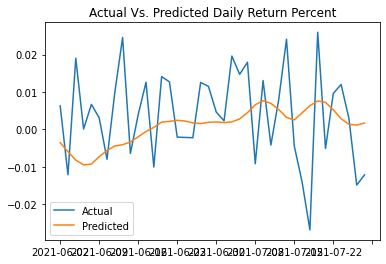

In [88]:
# Plot the real vs predicted prices as a line chart
aapl_daily_returns_df.plot(title="Actual Vs. Predicted Daily Return Percent")